In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29ycmVjdGlvbg=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_14947/2869396569.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=1234)

In [3]:
n = 500
p = 0.05
Y = rng.binomial(1, p=p, size=n)

In [4]:
rng = np.random.default_rng(seed=123)
P1 = rng.binomial(1, p=0.005, size=n)

In [5]:
P2 = np.zeros_like(P1)
for yy in range(n):
    if Y[yy]==0:
        P2[yy] = rng.binomial(1, p=0.10, size=1)[0]
    else:
        P2[yy] = rng.binomial(1, p=0.85, size=1)[0]

In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y, P1))

[[478   0]
 [ 22   0]]


In [7]:
print(confusion_matrix(Y, P2))

[[432  46]
 [  4  18]]


In [8]:
cm = confusion_matrix(Y, P2)
acc = cm.diagonal().sum()/cm.sum()
rec = cm[1,1]/cm[1,:].sum()
prec = cm[1,1]/cm[:,1].sum()
print(acc)
print(rec)
print(prec)

0.9
0.8181818181818182
0.28125


In [9]:
F1 = 2*(rec*prec)/(rec+prec)
print(F1)
rand = cm[:,0].sum()/n*cm[0,:].sum()/n + cm[:,1].sum()/n*cm[1,:].sum()/n
kappa = (acc-rand)/(1-rand)
print(kappa)

0.41860465116279066
0.37786183555644093


In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, cohen_kappa_score
print(accuracy_score(Y, P2), "**", accuracy_score(Y, P1))
print(recall_score(Y, P2), "**", recall_score(Y, P1))
print(precision_score(Y, P2), "**", precision_score(Y, P1))
print(f1_score(Y, P2), "**", f1_score(Y, P1))
print(cohen_kappa_score(Y, P2), "**", cohen_kappa_score(Y, P1))

0.9 ** 0.956
0.8181818181818182 ** 0.0
0.28125 ** 0.0
0.4186046511627907 ** 0.0
0.3778618355564404 ** 0.0


/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
df1 = pd.read_csv("../donnees/dd_exo3_1.csv", header=0, sep=',')
df2 = pd.read_csv("../donnees/dd_exo3_2.csv", header=0, sep=',')
df3 = pd.read_csv("../donnees/dd_exo3_3.csv", header=0, sep=',')

In [12]:
print(df1.describe())
print(df2.describe())
print(df3.describe())

                X1           X2            Y
count  1000.000000  1000.000000  1000.000000
mean      0.514433     0.492924     0.441000
std       0.281509     0.291467     0.496755
min       0.000516     0.000613     0.000000
25%       0.284947     0.238695     0.000000
50%       0.518250     0.494121     0.000000
75%       0.753628     0.739679     1.000000
max       0.999567     0.999829     1.000000
                X1           X2            Y
count  1000.000000  1000.000000  1000.000000
mean      0.520809     0.472473     0.308000
std       0.280013     0.283496     0.461898
min       0.002732     0.000890     0.000000
25%       0.296167     0.225272     0.000000
50%       0.521226     0.468858     0.000000
75%       0.764060     0.693746     1.000000
max       0.996044     0.999183     1.000000
                X1           X2            Y
count  1000.000000  1000.000000  1000.000000
mean      0.538032     0.454919     0.158000
std       0.273863     0.271638     0.364924
min       

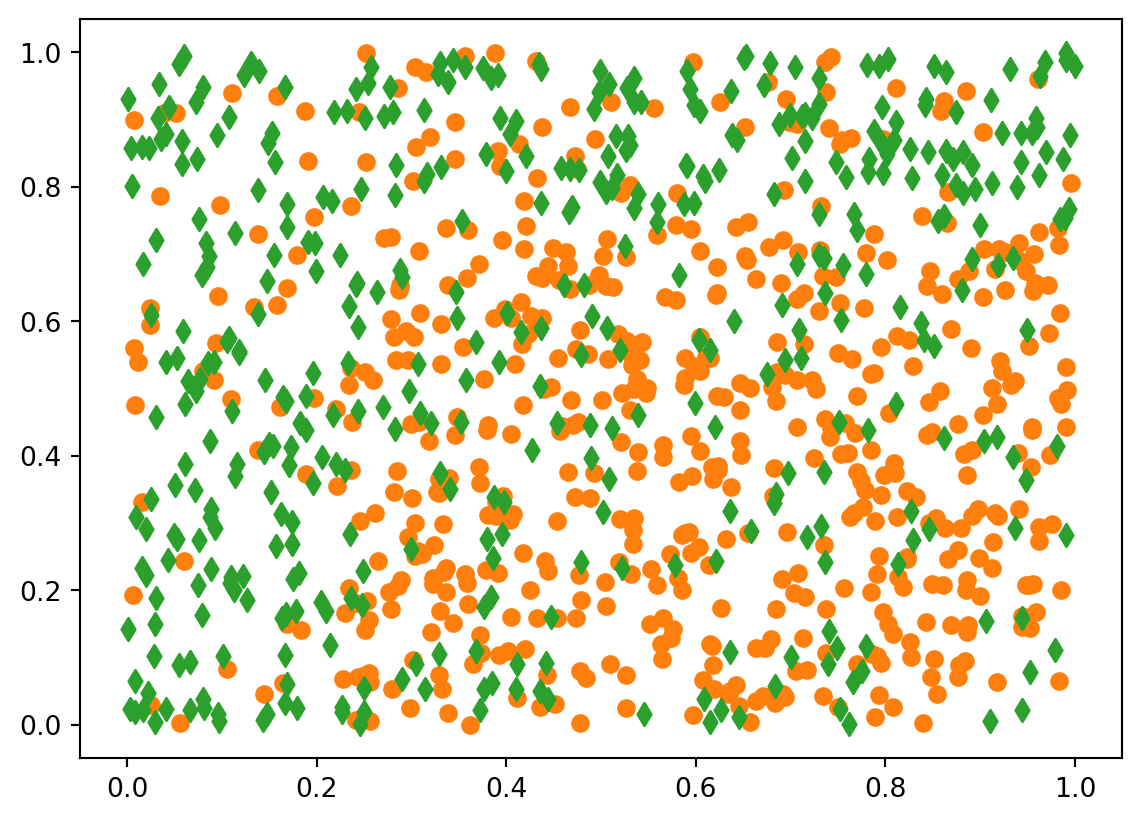

In [13]:
colo = ["C1", "C2"]
mark = ["o", "d"]
for yy in [0, 1]:
    plt.scatter(df1.loc[df1.Y==yy, "X1"], df1.loc[df1.Y==yy, "X2"], color=colo[yy], marker=mark[yy])

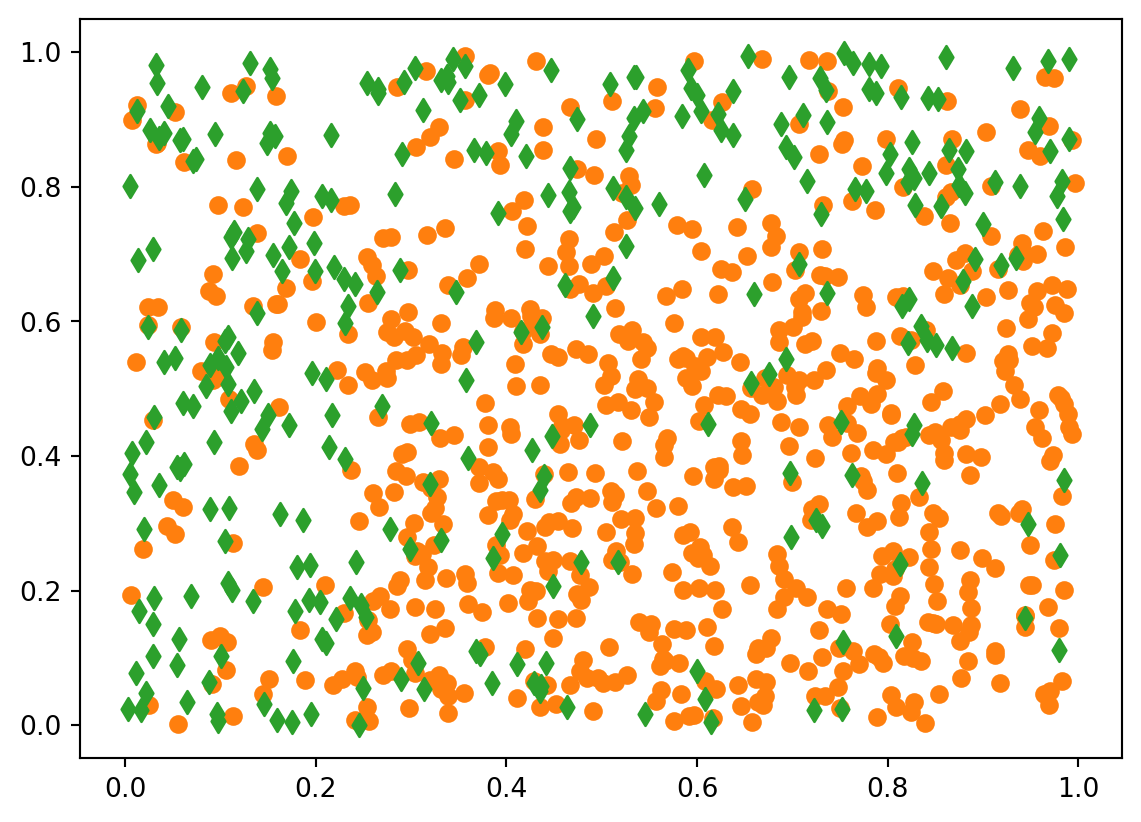

In [14]:
for yy in [0, 1]:
    plt.scatter(df2.loc[df2.Y==yy, "X1"], df2.loc[df2.Y==yy, "X2"], color=colo[yy], marker=mark[yy])

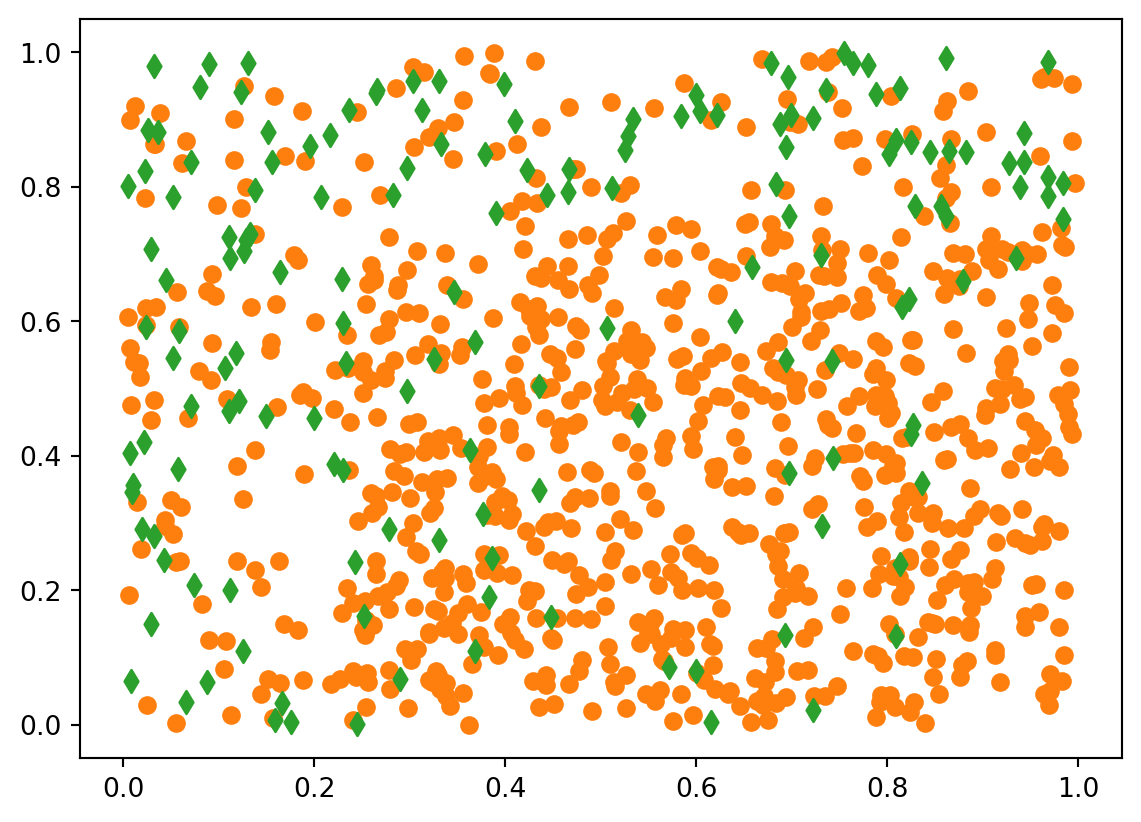

In [15]:
for yy in [0, 1]:
    plt.scatter(df3.loc[df3.Y==yy, "X1"], df3.loc[df3.Y==yy, "X2"], color=colo[yy], marker=mark[yy])

In [16]:
from sklearn.model_selection import train_test_split
## separation en matrice X, Y (et creation du produit=interaction)
T1 = df1.drop(columns="Y")
X1 = T1.assign(inter= T1.X1 * T1.X2).to_numpy()
y1 = df1.Y.to_numpy()
T2 = df2.drop(columns="Y")
X2 = T2.assign(inter= T2.X1 * T2.X2).to_numpy()
y2 = df2.Y.to_numpy()
T3 = df3.drop(columns="Y")
X3 = T3.assign(inter= T3.X1 * T3.X2).to_numpy()
y3 = df3.Y.to_numpy()
## separation apprentissage/validation
X1_app, X1_valid, y1_app, y1_valid = train_test_split(
    X1, y1, test_size=0.33, random_state=1234)
X2_app, X2_valid, y2_app, y2_valid = train_test_split(
    X2, y2, test_size=0.33, random_state=1234)
X3_app, X3_valid, y3_app, y3_valid = train_test_split(
    X3, y3, test_size=0.33, random_state=1234)

In [17]:
from sklearn.linear_model import LogisticRegression
mod1 = LogisticRegression(penalty=None, solver="newton-cholesky").fit(X1_app, y1_app)
mod2 = LogisticRegression(penalty=None, solver="newton-cholesky").fit(X2_app, y2_app)
mod3 = LogisticRegression(penalty=None, solver="newton-cholesky").fit(X3_app, y3_app)

In [18]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, cohen_kappa_score
P1 = mod1.predict(X1_valid)
P2 = mod1.predict(X2_valid)
P3 = mod1.predict(X3_valid)
s1 = pd.DataFrame({"crit": ["acc", "bal_acc", "F1", "Kappa"]})
s2 = pd.DataFrame({"crit": ["acc", "bal_acc", "F1", "Kappa"]})
s3 = pd.DataFrame({"crit": ["acc", "bal_acc", "F1", "Kappa"]})
print("--- donnees 1 ---")
s1 = s1.assign(brut=0.0)
s1.iloc[0,1] = accuracy_score(y1_valid, P1)
s1.iloc[1,1] = balanced_accuracy_score(y1_valid, P1)
s1.iloc[2,1] = f1_score(y1_valid, P1)
s1.iloc[3,1] = cohen_kappa_score(y1_valid, P1)
print(s1)
print("--- donnees 2 ---")
s2 = s2.assign(brut=0.0)
s2.iloc[0,1] = accuracy_score(y2_valid, P2)
s2.iloc[1,1] = balanced_accuracy_score(y2_valid, P2)
s2.iloc[2,1] = f1_score(y2_valid, P2)
s2.iloc[3,1] = cohen_kappa_score(y2_valid, P2)
print(s2)
print("--- donnees 3 ---")
s3 = s3.assign(brut=0.0)
s3.iloc[0,1] = accuracy_score(y3_valid, P3)
s3.iloc[1,1] = balanced_accuracy_score(y3_valid, P3)
s3.iloc[2,1] = f1_score(y3_valid, P3)
s3.iloc[3,1] = cohen_kappa_score(y3_valid, P3)
print(s3)

--- donnees 1 ---
      crit      brut
0      acc  0.657576
1  bal_acc  0.655825
2       F1  0.622074
3    Kappa  0.309572
--- donnees 2 ---
      crit      brut
0      acc  0.724242
1  bal_acc  0.740841
2       F1  0.637450
3    Kappa  0.427280
--- donnees 3 ---
      crit      brut
0      acc  0.693939
1  bal_acc  0.729286
2       F1  0.435754
3    Kappa  0.278103


In [19]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
## RandomOverSampler
ros3 = RandomOverSampler(random_state=123)
X3_app_reech, y3_app_reech = ros3.fit_resample(X3_app, y3_app)
mod3_ros = LogisticRegression(penalty=None, solver="newton-cholesky").fit(X3_app_reech, y3_app_reech)
## Smote
sm = RandomOverSampler(random_state=123)
X3_app_reech, y3_app_reech = sm.fit_resample(X3_app, y3_app)
mod3_sm = LogisticRegression(penalty=None, solver="newton-cholesky").fit(X3_app_reech, y3_app_reech)
## RandomUnderSampler
rus3 = RandomUnderSampler(random_state=123)
X3_app_reech, y3_app_reech = rus3.fit_resample(X3_app, y3_app)
mod3_rus = LogisticRegression(penalty=None, solver="newton-cholesky").fit(X3_app_reech, y3_app_reech)
## Tomek
tl = TomekLinks(sampling_strategy='all')
X3_app_reech, y3_app_reech = tl.fit_resample(X3_app, y3_app)
mod3_tl = LogisticRegression(penalty=None, solver="newton-cholesky").fit(X3_app_reech, y3_app_reech)

In [20]:
P3_ros = mod3_ros.predict(X3_valid)
P3_sm = mod3_sm.predict(X3_valid)
P3_rus = mod3_rus.predict(X3_valid)
P3_tl = mod3_tl.predict(X3_valid)

In [21]:
s3 = s3.assign(ros=[accuracy_score(y3_valid, P3_ros),
balanced_accuracy_score(y3_valid, P3_ros),
f1_score(y3_valid, P3_ros),
cohen_kappa_score(y3_valid, P3_ros)])
s3 = s3.assign(sm=[accuracy_score(y3_valid, P3_sm),
balanced_accuracy_score(y3_valid, P3_sm),
f1_score(y3_valid, P3_sm),
cohen_kappa_score(y3_valid, P3_sm)])
s3 = s3.assign(rus=[accuracy_score(y3_valid, P3_rus),
balanced_accuracy_score(y3_valid, P3_rus),
f1_score(y3_valid, P3_rus),
cohen_kappa_score(y3_valid, P3_rus)])
s3 = s3.assign(tl=[accuracy_score(y3_valid, P3_tl),
balanced_accuracy_score(y3_valid, P3_tl),
f1_score(y3_valid, P3_tl),
cohen_kappa_score(y3_valid, P3_tl)])
print(s3)

      crit      brut       ros        sm       rus        tl
0      acc  0.693939  0.603030  0.603030  0.612121  0.854545
1  bal_acc  0.729286  0.683929  0.683929  0.689286  0.520000
2       F1  0.435754  0.379147  0.379147  0.384615  0.076923
3    Kappa  0.278103  0.192415  0.192415  0.200606  0.066038
